In [7]:
!pip install kaggle

In [8]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam

In [9]:
kaggle_credentails = json.load(open("kaggle.json"))

In [10]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [11]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.03G/2.04G [00:24<00:00, 107MB/s] 
100% 2.04G/2.04G [00:24<00:00, 90.1MB/s]


In [12]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [13]:
with ZipFile("plantvillage-dataset.zip",'r') as zip_ref:
  zip_ref.extractall()

#**VGG16**

In [ ]:
img_size = (224,224)
batch_size = 128

In [ ]:
base_dir = '/content/plantvillage dataset/color'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 43456 images belonging to 38 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 10849 images belonging to 38 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import math


vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
for layer in vgg16_base.layers[:15]:
    layer.trainable = False

model_vgg16 = models.Sequential()
model_vgg16.add(vgg16_base)
model_vgg16.add(layers.Flatten())
model_vgg16.add(layers.Dense(256, activation='relu'))
model_vgg16.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model_vgg16.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {validation_generator.samples}")
print(f"Number of classes: {train_generator.num_classes}")

steps_per_epoch = math.ceil(train_generator.samples / batch_size)
validation_steps = math.ceil(validation_generator.samples / batch_size)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_model_vgg16.keras',
    monitor='val_loss',
    save_best_only=True
)


#model_vgg16.summary()

Number of training samples: 43456
Number of validation samples: 10849
Number of classes: 38


In [ ]:
history = model_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs= 5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/5
339/339 ━━━━━━━━━━━━━━━━━━━━ 169s 479ms/step - accuracy: 0.5139 - loss: 1.8069 - val_accuracy: 0.8772 - val_loss: 0.3677
Epoch 2/5
339/339 ━━━━━━━━━━━━━━━━━━━━ 162s 480ms/step - accuracy: 0.8438 - loss: 0.4914 - val_accuracy: 0.9059 - val_loss: 0.2639
Epoch 3/5
339/339 ━━━━━━━━━━━━━━━━━━━━ 154s 455ms/step - accuracy: 0.8856 - loss: 0.3420 - val_accuracy: 0.9089 - val_loss: 0.2786
Epoch 4/5
339/339 ━━━━━━━━━━━━━━━━━━━━ 165s 489ms/step - accuracy: 0.9005 - loss: 0.2944 - val_accuracy: 0.9327 - val_loss: 0.1861
Epoch 5/5
339/339 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9218 - loss: 0.1964 - val_accuracy: 0.9691 - val_loss: 0.1199


In [ ]:
model_vgg16.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,171,188 (183.76 MB)

 Trainable params: 13,511,974 (51.54 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 27,023,950 (103.09 MB)

340/340 ━━━━━━━━━━━━━━━━━━━━ 46s 134ms/step - accuracy: 0.9363 - loss: 0.1862
Validation Loss: 0.17817407846450806
Validation Accuracy: 0.9395335912704468


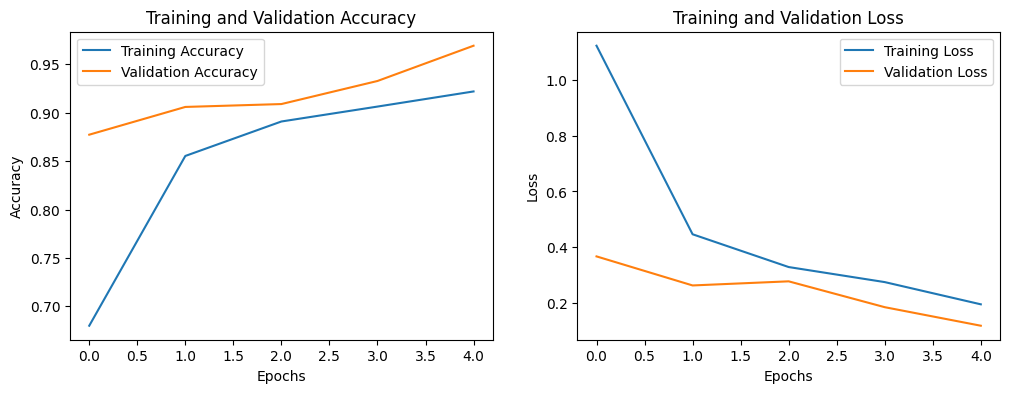

In [ ]:
import matplotlib.pyplot as plt

loss, accuracy = model_vgg16.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


def plot_model_performance(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_model_performance(history)



In [1]:
from tensorflow.keras.applications import VGG19
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import math

In [2]:
img_size = (224,224)
batch_size = 128

In [9]:
base_dir = 'D:\Plant_disease\plantvillage dataset\color'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Admin\AppData\Local\Temp\ipykernel_804\4007868781.py:1: SyntaxWarning: invalid escape sequence '\P'
  base_dir = 'D:\Plant_disease\plantvillage dataset\color'


In [11]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 43456 images belonging to 38 classes.


In [13]:
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [15]:
validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 10849 images belonging to 38 classes.


In [17]:
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(*img_size, 3))

for layer in vgg19_base.layers[:15]:
    layer.trainable = False


model_vgg19 = models.Sequential()
model_vgg19.add(vgg19_base)
model_vgg19.add(layers.Flatten())
model_vgg19.add(layers.Dense(256, activation='relu'))  # Fully connected layer with 256 units
model_vgg19.add(layers.Dense(train_generator.num_classes, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model_vgg19.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the dataset information
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {validation_generator.samples}")
print(f"Number of classes: {train_generator.num_classes}")

# Calculate the steps per epoch and validation steps
steps_per_epoch = math.ceil(train_generator.samples / batch_size)
validation_steps = math.ceil(validation_generator.samples / batch_size)

# Set up early stopping to avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Set up model checkpoint to save the best version of the model
model_checkpoint = ModelCheckpoint(
    'best_model_vgg19.keras',
    monitor='val_loss',
    save_best_only=True
)



80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 65s 1us/step
Number of training samples: 43456
Number of validation samples: 10849
Number of classes: 38


In [ ]:
history = model_vgg19.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs= 5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/5


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 11/339 ━━━━━━━━━━━━━━━━━━━━ 3:29:02 38s/step - accuracy: 0.1371 - loss: 3.5179